# پروژه ۱ — مبانی یادگیری نظارت‌شده و مدل‌های پارامتریک (نسخهٔ راه‌حل)
**Supervised Learning Foundations & Parametric Models — Instructor Solution **

**هدف:** مقایسهٔ تحلیلی بین مدل‌های *generative* (مثل **Naive Bayes**) و *discriminative* (مثل **Logistic Regression**).  
Students will implement Logistic Regression **from scratch** (only `numpy`) using Gradient Descent, plot **Cost vs Iterations**, compare decision boundaries, and answer analytic questions.

## بخش 1 — معرفی دیتاست (Dataset) و هدف مسئله

**Dataset:** Breast Cancer Wisconsin (Diagnostic) — available via `sklearn.datasets` (origin: UCI ML Repository).

**Basic facts / حقایق پایه:**
- samples: **569**
- features: **30 numeric features** (mean, se, worst for various cell metrics)
- target: **0 = malignant**, **1 = benign**


### بخش 2 — بارگذاری داده و تحلیل اولیه (Load & EDA)

در این بخش داده بارگذاری و برخی آمار اولیه و توزیعات نمایش داده می‌شود.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_full = cancer.data
y_full = cancer.target
feature_names = cancer.feature_names

print('Samples:', X_full.shape[0])
print('Features:', X_full.shape[1])
print('Classes distribution:', np.bincount(y_full))

# show first rows as DataFrame for inspect
df = pd.DataFrame(X_full, columns=feature_names)
df['target'] = y_full
df.head()

Samples: 569
Features: 30
Classes distribution: [212 357]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### بخش 3 — پیش‌پردازش (Preprocessing)

We will select **two features** for visualization (for decision boundary plots). We also standardize features because gradient descent converges faster on scaled features.

Why is feature standardization important for gradient-based training?



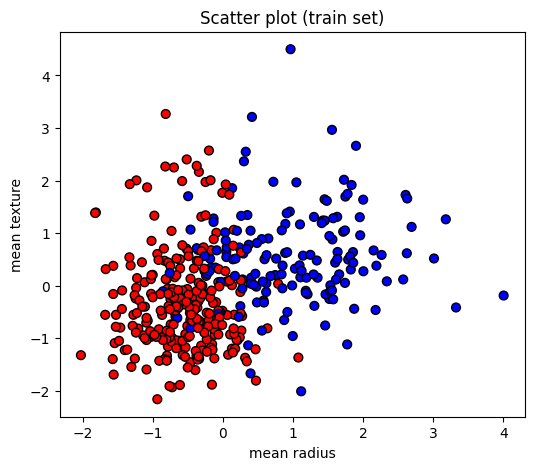

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# select two features for visualization: mean radius and mean texture (indices 0 and 1)
feat_idx = [0, 1]
X = X_full[:, feat_idx]
y = y_full

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(X_train_s[:,0], X_train_s[:,1], c=y_train, cmap='bwr', edgecolor='k', s=40)
plt.xlabel(feature_names[feat_idx[0]])
plt.ylabel(feature_names[feat_idx[1]])
plt.title('Scatter plot (train set)')
plt.show()

### بخش 4 — پیاده‌سازی Logistic Regression از صفر (From-scratch implementation)

**Theory recap:**
- Sigmoid: $\\sigma(z)=1/(1+e^{-z})$
- Log Loss (binary): $J(w) = -\\frac{1}{m} \\sum [ y \\log(h) + (1-y)\\log(1-h) ]$ where $h=\\sigma(Xw)$
- Gradient: $\\nabla J = \\frac{1}{m} X^T (h - y)$

Implement gradient descent (batch) for logistic regression. Explain each step in comments.

In [ ]:
import numpy as np


class LogisticFromScratch:
    pass


# train
model = LogisticFromScratch(lr=0.1, n_iter=2000, verbose=True)
model.fit(X_train_s, y_train)
print('Finished training')

iter=0, loss=0.693147
iter=200, loss=0.287673
iter=400, loss=0.269311
iter=600, loss=0.263931
iter=800, loss=0.261782
iter=1000, loss=0.260797
iter=1200, loss=0.260311
iter=1400, loss=0.260058
iter=1600, loss=0.259923
iter=1800, loss=0.259850
Finished training


### بخش 5 — نمودار همگرایی (Cost vs Iterations) و تحلیل نرخ یادگیری

Plot loss history and experiment with lr = [1.0, 0.1, 0.01]. How does learning rate affect convergence? 

- lr too large -> divergence or oscillation.
- lr moderate -> fast stable convergence.
- lr too small -> slow convergence (may need many iterations).


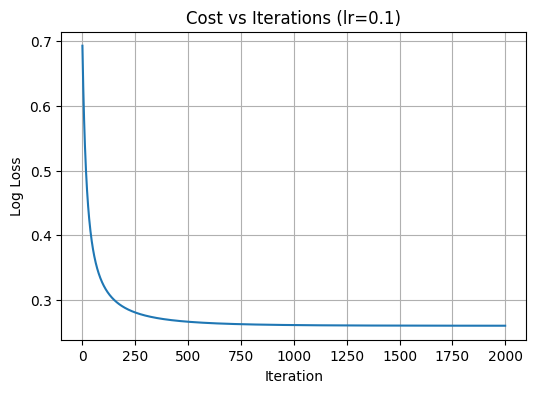

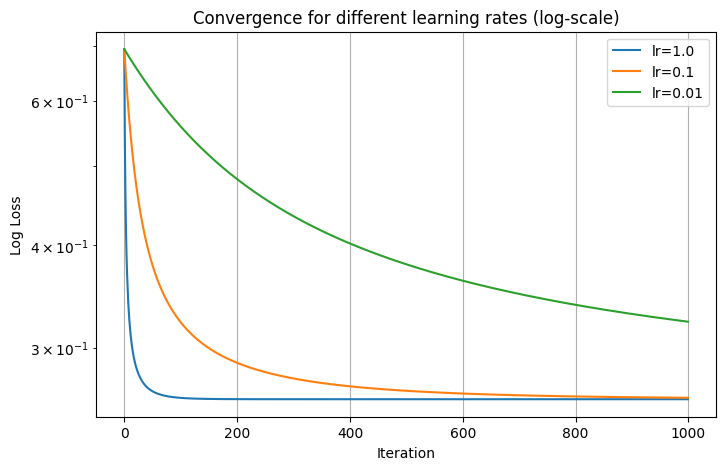

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(model.loss_history)
plt.title('Cost vs Iterations (lr=0.1)')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()

# experiment with different learning rates
results_lr = {}
for lr in [1.0, 0.1, 0.01]:
    pass

plt.figure(figsize=(8,5))
for lr, hist in results_lr.items():
    plt.plot(hist, label=f'lr={lr}')
plt.yscale('log')
plt.title('Convergence for different learning rates (log-scale)')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()

### بخش 6 — ارزیابی عملکرد و مقایسه با Gaussian Naive Bayes

- Compute Accuracy, ROC AUC, and present classification reports for:
  1. LogisticFromScratch
  2. LogisticRegression (sklearn)
  3. GaussianNB




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# our model
y_pred = model.predict(X_test_s)
y_prob = model.predict_proba(X_test_s)

# sklearn logistic
lr_clf = LogisticRegression().fit(X_train_s, y_train)
y_pred_lr = lr_clf.predict(X_test_s)
y_prob_lr = lr_clf.predict_proba(X_test_s)[:,1]

# gaussian nb
gnb = GaussianNB().fit(X_train_s, y_train)
y_pred_gnb = gnb.predict(X_test_s)
y_prob_gnb = gnb.predict_proba(X_test_s)[:,1]

# metrics
metrics = []
for name, yp, yp_prob in [('Logistic_scratch', y_pred, y_prob), ('Logistic_sklearn', y_pred_lr, y_prob_lr), ('GaussianNB', y_pred_gnb, y_prob_gnb)]:
    if hasattr(yp_prob, 'ndim') and yp_prob.ndim > 1:
        yp_prob = yp_prob[:,1]
    acc = accuracy_score(y_test, yp)
    auc = roc_auc_score(y_test, yp_prob)
    metrics.append((name, acc, auc))

import pandas as pd
metrics_df = pd.DataFrame(metrics, columns=['model','accuracy','roc_auc'])
metrics_df

# print classification reports
print('--- Logistic from scratch ---')
print(classification_report(y_test, y_pred))
print('--- Logistic sklearn ---')
print(classification_report(y_test, y_pred_lr))
print('--- GaussianNB ---')
print(classification_report(y_test, y_pred_gnb))

--- Logistic from scratch ---
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        53
           1       0.90      0.92      0.91        90

    accuracy                           0.89       143
   macro avg       0.88      0.88      0.88       143
weighted avg       0.89      0.89      0.89       143

--- Logistic sklearn ---
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        53
           1       0.90      0.92      0.91        90

    accuracy                           0.89       143
   macro avg       0.88      0.88      0.88       143
weighted avg       0.89      0.89      0.89       143

--- GaussianNB ---
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        53
           1       0.88      0.94      0.91        90

    accuracy                           0.88       143
   macro avg       0.88      0.86      0.87       143


### بخش 7 — ترسیم مرز تصمیم (Decision Boundaries)


- Logistic: linear boundary (in feature space).
- GaussianNB: boundary can be quadratic depending on covariance assumptions; with identical covariances it becomes linear but with different covariances it may curve.


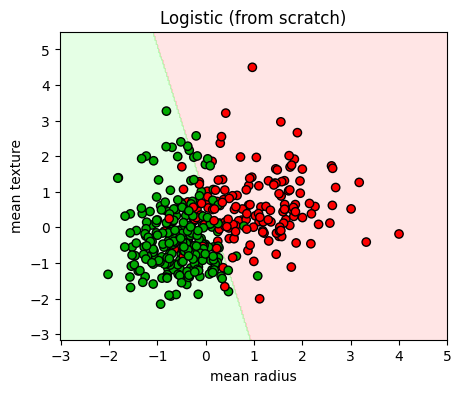

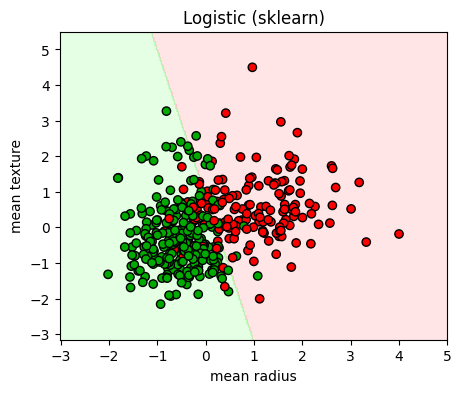

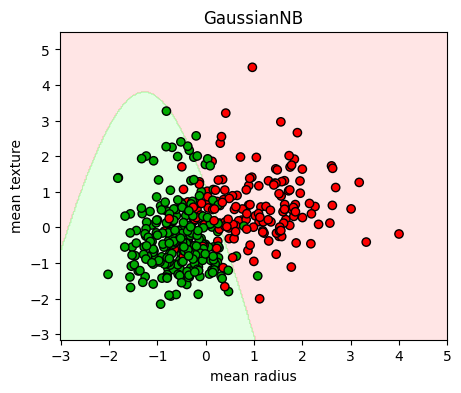

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title):
    pass

plot_decision_boundary(model, X_train_s, y_train, 'Logistic (from scratch)')
plot_decision_boundary(lr_clf, X_train_s, y_train, 'Logistic (sklearn)')
plot_decision_boundary(gnb, X_train_s, y_train, 'GaussianNB')

### بخش 8 — جمع‌بندی، محدودیت‌ها و چالش‌های تکمیلی

**Final summary / نتیجه‌گیری:**
- In this dataset Logistic (discriminative) outperforms GaussianNB slightly in AUC/accuracy.

**Limitations:**
- We only used two features for visualization; high-dimensional behaviour may differ.
- Naive Bayes assumptions (conditional independence) are not satisfied here.

## این موارد را می‌توانید انجام دهید(اختیاری)
1. Add L2 regularization to the from-scratch implementation and study effect on weights and test AUC.
2. Implement stochastic gradient descent (mini-batch) and compare convergence speed.
